# Analysis of Political Parties

In Slovenia, before the 2018 elections, the political parties were asked to answer some of the questions, to find out about their ideology. The agregate results were found the the Political portret website ( https://danesjenovdan.si/politicni-portret/ ). 

The data, that I copied from that website can be found on: http://sarajaksa.eu/content/static/politicno-mnenje.csv

In [1]:
import pandas

In [2]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.stats import wilcoxon

In [3]:
from matplotlib import pyplot

In order to analise the data, it first needs to be imported and cleaned and the variables needed later need to be created. 

In [4]:
my_answers = [10, 60, 50, 33, 62, 12, 48, 24, 10, 71, 10, 60, 21, 33, 19, 43]

In [5]:
political_opinion = pandas.read_csv("politicno-mnenje.csv", sep=',')

In [6]:
political_opinion.head(3)

,StrankaIme,Stranka,Konstruktivizem,Esencializem,Rehabilitacija,Kaznovanje,Progresivnost,Konzervativnost,Internacionalizem,Nacionalizem,Komunizem,Kapitalizem,Regulacija,Laissez-faire,Ekologija,Produktivnost,Revolucija,Reformizem
0,Zeleni Slovenije,Zeleni,21,28,33,39,38,22,29,44,40,25,51,14,54,10,12,62
1,Demokratična Stranka Upokojencev,DESUS,19,31,21,40,45,14,31,24,24,31,50,21,24,21,5,60
2,Gospodarsko Aktivna Stranka,GAS,40,52,40,36,48,38,50,31,19,69,38,43,50,38,0,95


In [7]:
stranke = political_opinion.Stranka

In [8]:
political_opinion = political_opinion.loc[:,political_opinion.columns[2:]]

In [9]:
prepričanja = political_opinion.columns

In [10]:
political_opinion.head(3)

,Konstruktivizem,Esencializem,Rehabilitacija,Kaznovanje,Progresivnost,Konzervativnost,Internacionalizem,Nacionalizem,Komunizem,Kapitalizem,Regulacija,Laissez-faire,Ekologija,Produktivnost,Revolucija,Reformizem
0,21,28,33,39,38,22,29,44,40,25,51,14,54,10,12,62
1,19,31,21,40,45,14,31,24,24,31,50,21,24,21,5,60
2,40,52,40,36,48,38,50,31,19,69,38,43,50,38,0,95


## Nearest Party

The first thing that I wanted to do, was to see which party is the most similar to me. The information of the person studied is saved in the my_answers variable, that is defined above. After that, the euqilidian distance is calculated between these answers and each party. 

In [11]:
razdalja_do_strank = []

In [12]:
for i, stranka in enumerate(stranke):
    stranka_answers = list(political_opinion.iloc[i])
    current = [stranka, sum([(s - m)**2 for s, m in zip(stranka_answers, my_answers)])]
    razdalja_do_strank.append(current)

In [13]:
razdalja_do_strank = pandas.DataFrame(razdalja_do_strank)

In [14]:
razdalja_do_strank.columns = ["Stranka", "Razdalja"]

In [15]:
razdalja_do_strank.sort_values(by="Razdalja", ascending=True, inplace=True)

In [16]:
razdalja_do_strank

,Stranka,Razdalja
9,Elite,4068
3,K+P,6196
14,SMC,6580
10,SNS,6608
2,GAS,7087
7,Nsi,7799
1,DESUS,7949
5,LMŠ,8989
6,Naprej,10445
0,Zeleni,11748


## Nearest Party - Try 2

There is another way to see, which party is the most similar to the answers provided.

In [17]:
all_answers = political_opinion

In [18]:
row_to_append = pandas.Series(list(my_answers), index=list(prepričanja))

In [19]:
all_answers = all_answers.append(row_to_append, ignore_index=True)

In [20]:
all_names = list(stranke)
all_names.append("Me")

In [21]:
all_answers["Stranke"] = all_names

In [22]:
all_answers["Konstruktivizem"] = 100 - all_answers["Konstruktivizem"]
all_answers["Konstruktivizem-Esencializem"] = (all_answers["Konstruktivizem"] + all_answers["Esencializem"])/2
all_answers.drop("Konstruktivizem", axis=1, inplace=True)
all_answers.drop("Esencializem", axis=1, inplace=True)
all_answers["Rehabilitacija"] = 100 - all_answers["Rehabilitacija"]
all_answers["Rehabilitacija-Kaznovanje"] = (all_answers["Rehabilitacija"] + all_answers["Kaznovanje"])/2
all_answers.drop("Rehabilitacija", axis=1, inplace=True)
all_answers.drop("Kaznovanje", axis=1, inplace=True)
all_answers["Progresivnost"] = 100 - all_answers["Progresivnost"]
all_answers["Progresivnost-Konzervativnost"] = (all_answers["Progresivnost"] + all_answers["Konzervativnost"])/2
all_answers.drop("Progresivnost", axis=1, inplace=True)
all_answers.drop("Konzervativnost", axis=1, inplace=True)
all_answers["Internacionalizem"] = 100 - all_answers["Internacionalizem"]
all_answers["Internacionalizem-Nacionalizem"] = (all_answers["Internacionalizem"] + all_answers["Nacionalizem"])/2
all_answers.drop("Internacionalizem", axis=1, inplace=True)
all_answers.drop("Nacionalizem", axis=1, inplace=True)
all_answers["Kapitalizem"] = 100 - all_answers["Kapitalizem"]
all_answers["Kapitalizem-Komunizem"] = (all_answers["Kapitalizem"] + all_answers["Komunizem"])/2
all_answers.drop("Kapitalizem", axis=1, inplace=True)
all_answers.drop("Komunizem", axis=1, inplace=True)
all_answers["Regulacija"] = 100 - all_answers["Regulacija"]
all_answers["Regulacija-Laissez-faire"] = (all_answers["Regulacija"] + all_answers["Laissez-faire"])/2
all_answers.drop("Regulacija", axis=1, inplace=True)
all_answers.drop("Laissez-faire", axis=1, inplace=True)
all_answers["Ekologija"] = 100 - all_answers["Ekologija"]
all_answers["Ekologija-Produktivnost"] = (all_answers["Ekologija"] + all_answers["Produktivnost"])/2
all_answers.drop("Ekologija", axis=1, inplace=True)
all_answers.drop("Produktivnost", axis=1, inplace=True)

all_answers["Revolucija"] = 100 - all_answers["Revolucija"]
all_answers["Revolucija-Reformizem"] = (all_answers["Revolucija"] + all_answers["Reformizem"])/2
all_answers.drop("Revolucija", axis=1, inplace=True)
all_answers.drop("Reformizem", axis=1, inplace=True)

In [23]:
all_answers

,Stranke,Konstruktivizem-Esencializem,Rehabilitacija-Kaznovanje,Progresivnost-Konzervativnost,Internacionalizem-Nacionalizem,Kapitalizem-Komunizem,Regulacija-Laissez-faire,Ekologija-Produktivnost,Revolucija-Reformizem
0,Zeleni,53.5,53.0,42.0,57.5,57.5,31.5,28.0,75.0
1,DESUS,56.0,59.5,34.5,46.5,46.5,35.5,48.5,77.5
2,GAS,56.0,48.0,45.0,40.5,25.0,52.5,44.0,97.5
3,K+P,57.0,51.5,47.5,44.0,51.5,53.5,49.0,68.0
4,Levica,8.5,24.0,15.5,8.5,88.0,1.0,37.0,16.5
5,LMŠ,58.5,60.5,49.0,44.0,43.0,32.0,34.5,75.0
6,Naprej,66.5,55.0,56.0,46.5,46.5,57.0,21.5,33.5
7,Nsi,76.0,59.5,61.0,53.5,38.0,50.0,44.0,85.5
8,Pirati,29.5,34.5,21.5,28.5,59.5,21.5,52.0,58.0
9,Elite,62.0,51.5,48.5,28.5,38.0,55.0,50.0,67.5


In [24]:
razdalja_do_strank_2 = []

In [25]:
my_answers = all_answers.iloc[19]

In [26]:
for i, stranka in enumerate(stranke):
    stranka_answers = list(all_answers.iloc[i])
    current = [stranka, sum([abs(s - m) for s, m in zip(stranka_answers[1:], my_answers[1:])])]
    razdalja_do_strank_2.append(current)

In [27]:
razdalja_do_strank_2 = pandas.DataFrame(razdalja_do_strank_2)
razdalja_do_strank_2.columns = ["Stranka", "Razdalja"]
razdalja_do_strank_2.sort_values(by="Razdalja", ascending=True, inplace=True)

In [28]:
razdalja_do_strank_2

,Stranka,Razdalja
9,Elite,106.0
3,K+P,123.0
2,GAS,123.5
10,SNS,130.0
14,SMC,142.0
1,DESUS,144.5
7,Nsi,149.5
5,LMŠ,166.5
8,Pirati,167.0
6,Naprej,169.5


## Difference in Party/Person

Here a person could see where the differences are. Based on the number that is saved in the i, the party compared is chosen. The index next to the name on the list below is the number that needs to be used.

In [29]:
stranke

0          Zeleni
1           DESUS
2             GAS
3             K+P
4          Levica
5             LMŠ
6          Naprej
7             Nsi
8          Pirati
9           Elite
10            SNS
11             SD
12    Solidarnost
13            SAB
14            SMC
15            SSN
16        Zdravje
17            ZLS
18             ZS
Name: Stranka, dtype: object

In [30]:
i = 8

In [31]:
stranka_answers = list(all_answers.iloc[i])

In [32]:
stranka_answers

['Pirati', 29.5, 34.5, 21.5, 28.5, 59.5, 21.5, 52.0, 58.0]

In [33]:
razlike = [abs(s - m) for s, m in zip(stranka_answers[1:], my_answers[1:])]

In [34]:
imenovane_razlike = []

In [35]:
for p, r in zip(all_answers.columns[1:], razlike):
    razlika = [p, r]
    imenovane_razlike.append(razlika)

In [36]:
imenovane_razlike = pandas.DataFrame(imenovane_razlike)
imenovane_razlike.columns = ["Razlika", "Razdalja"]
imenovane_razlike.sort_values(by="Razdalja", ascending=False, inplace=True)

In [37]:
imenovane_razlike

,Razlika,Razdalja
5,Regulacija-Laissez-faire,53.5
0,Konstruktivizem-Esencializem,45.5
4,Kapitalizem-Komunizem,40.0
3,Internacionalizem-Nacionalizem,9.5
1,Rehabilitacija-Kaznovanje,7.0
6,Ekologija-Produktivnost,4.0
7,Revolucija-Reformizem,4.0
2,Progresivnost-Konzervativnost,3.5


## Hirarhical clustering

The next analysis shows, how the different political parties are diferentiated. 

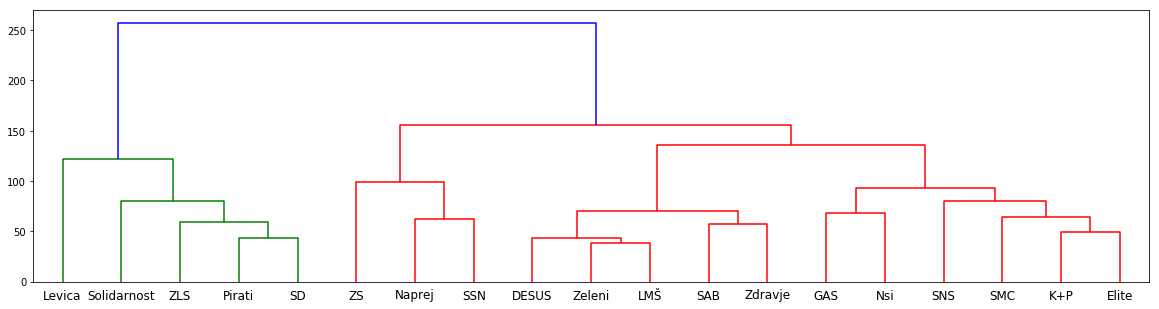

In [38]:
connections = linkage(political_opinion, "ward")
pyplot.figure(figsize=(20,5))
dendrogram(connections, labels=list(stranke))
pyplot.show()

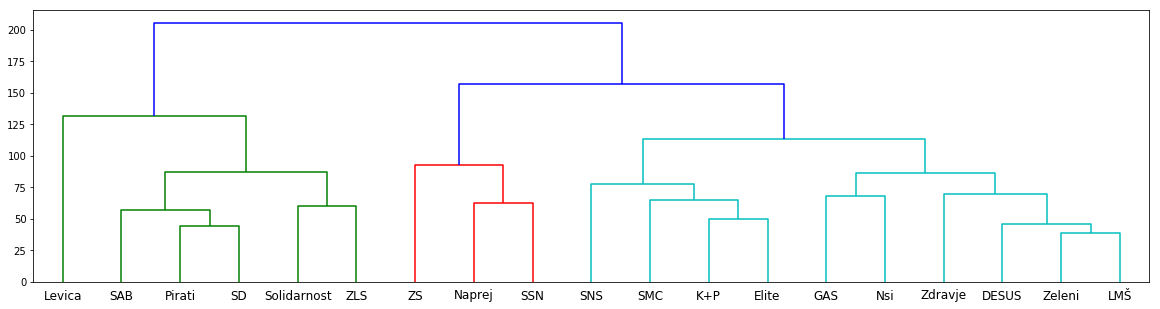

In [39]:
connections = linkage(political_opinion, "complete")
pyplot.figure(figsize=(20,5))
dendrogram(connections, labels=list(stranke))
pyplot.show()

# K-mean clustering

In order to see, if the clusters found in the upper analysis are stable, I also tested this with k-mean clustering. 

In [40]:
number_of_groups = 3
political_orientation = KMeans(n_clusters=number_of_groups)
political_orientation.fit(political_opinion)
for i in range(0, number_of_groups):
    print([stranka for cluster, stranka in zip(political_orientation.labels_, stranke) if cluster == i])

['Levica', 'Pirati', 'SD', 'Solidarnost', 'SAB', 'ZLS']
['Zeleni', 'DESUS', 'GAS', 'K+P', 'LMŠ', 'Nsi', 'Elite', 'SMC', 'Zdravje']
['Naprej', 'SNS', 'SSN', 'ZS']
